# EQUAL AND UNEQUAL-TIME MATTER POWER SPECTRUM

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

from astropy.cosmology import FlatLambdaCDM
from skypy.power_spectrum import growth_function

cosmo = FlatLambdaCDM(H0=67.11, Ob0=0.049, Om0= 0.2685)

import sys
sys.path.append("../power/EDS/")
from matter import matter_power_spectrum_1loop as P1loop
from matter import matter_unequal_time_power_spectrum as Puetc
# from unequalpy.power import matter_power_spectrum_1loop as P1loop
# from unequalpy.power import matter_unequal_time_power_spectrum as Puetc

### FAST-PT PRECOMPUTED VALUES

In [2]:
d = np.loadtxt('Pfastpt.txt',unpack=True)
ks = d[:, 0]
pk = d[:, 1]
p22 = d[:, 2]
p13 = d[:, 3]

p11_int = interp1d( ks, pk, fill_value="extrapolate")
p22_int = interp1d( ks, p22, fill_value="extrapolate")
p13_int = interp1d( ks, p13, fill_value="extrapolate")
powerk = (p11_int, p22_int, p13_int)

### QUIJOTE SIMULATIONS 

In [3]:
err = np.load('Quijote_error_0.npy')
arrays = np.load("Quijote_kp_0.npy") 
k, p = arrays

## POWER SPECTRA

The normalised growth function from SkyPy:

In [4]:
g0 = growth_function(0, cosmo)
D0 = growth_function(0, cosmo) / g0
D1 = growth_function(1, cosmo) / g0
D2 = growth_function(2, cosmo) / g0
Dvec = np.array([D0,D1])
Dvec2 = np.array([D0,D1, D2])

By evaluating the unequal-time power spectra at redshift z1 = z2, we should obtain the equal-time power spectra. We use two frameworks: Standard Perturbation Theory and Effective Field Theory.                            

In [5]:
pe=P1loop(ks,D0, powerk)
pu=Puetc(ks, Dvec, Dvec, powerk)

In [6]:
ct0, ct1, ct2 = -0.4, -0.2, -0.1
ctvec = np.array([ct0,ct1])
ctvec2 = np.array([ct0,ct1, ct2])

In [7]:
peft=P1loop(ks, D0, powerk, ct0, model='eft')
pueft=Puetc(ks, Dvec, Dvec2, powerk, ctvec, ctvec2, model='eft')

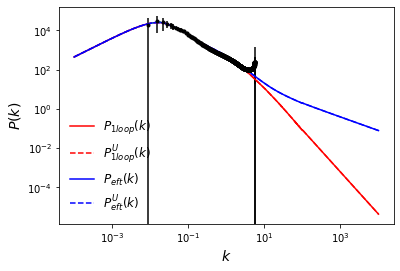

In [8]:
# Plot
plt.plot(ks,pe, 'r', label='$P_{1loop}(k)$')
plt.plot(ks,pu[0][0], 'r--', label='$P^U_{1loop}(k)$')
plt.plot(ks,peft, 'b', label='$P_{eft}(k)$')
plt.plot(ks,pueft[0][0], 'b--', label='$P^U_{eft}(k)$')


plt.loglog(k, p, ':')
plt.errorbar(k, p, yerr=err, fmt=".k", capsize=0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$P(k)$', fontsize=14)
plt.legend(loc='lower left', fontsize=12, frameon=False);

# UNEQUAL-TIME APPROXIMATIONS

In [9]:
import sys
sys.path.append("../analysis/")

from power import unequal_power_squared as Puneq2
from power import geometric_approx_squared as PPgeom
from power import midpoint_approx as Pmid
# from unequalpy.analysis import unequal_power_squared as Puneq2
# from unequalpy.analysis import geometric_approx_squared as PPgeom
# from unequalpy.analysis import midpoint_approx as Pmid

* Squared of the exact unequal-time power spectrum

In [10]:
pu2spt = Puneq2(ks, Dvec, Dvec2, powerk)
pu2eft = Puneq2(ks, Dvec, Dvec2, powerk, ctvec, ctvec2, 'eft')

* Geometric approximation

In [11]:
ppgspt = PPgeom(ks, Dvec, Dvec2, powerk)
ppgeft = PPgeom(ks, Dvec, Dvec2, powerk, ctvec, ctvec2, 'eft')

* Midpoint approximation

In [19]:
pmspt = Pmid(ks, Dvec, Dvec2, powerk)
pmeft = Pmid(ks, Dvec, Dvec2, powerk, ctvec, ctvec2, 'eft')

(3, 2)
(3, 2)


In [18]:
pmspt.shape, ppgeft.shape

((2, 3, 3511), (2, 3, 3511))

### Plots
At the same value of redshift, the squared unequal-time power spectrum and the geometric should be the same.

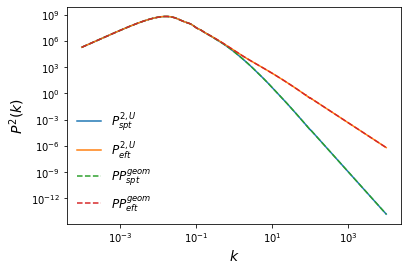

In [14]:
# Plot
plt.plot(ks,pu2spt[0][0], label='$P^{2,U}_{spt}$')
plt.plot(ks,pu2eft[0][0], label='$P^{2,U}_{eft}$')
plt.plot(ks,ppgspt[0][0], '--', label='$PP^{geom}_{spt}$')
plt.plot(ks,ppgeft[0][0], '--', label='$PP^{geom}_{eft}$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$P^2(k)$', fontsize=14)
plt.legend(loc='lower left', fontsize=12, frameon=False);

At the same value of redshift, the equal-time power spectrum
and the midpoint approximation should be the same.

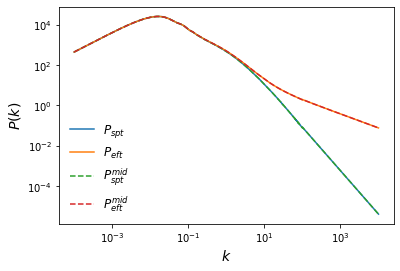

In [28]:
# Plot
plt.plot(ks,pe, label='$P_{spt}$')
plt.plot(ks,peft, label='$P_{eft}$')
plt.plot(ks,pmspt[0][0], '--', label='$P^{mid}_{spt}$')
plt.plot(ks,pmeft[0][0], '--', label='$P^{mid}_{eft}$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$P(k)$', fontsize=14)
plt.legend(loc='lower left', fontsize=12, frameon=False);

#### Effects of the different approximations

Let us now choose two different values of redshift:
* SPT
    

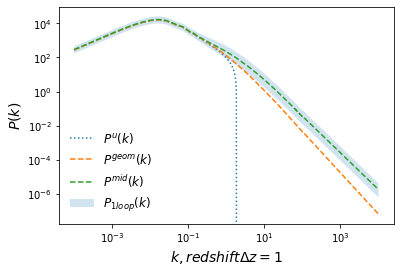

In [34]:
# Plot
plt.plot(ks,pu[0][1], ':', label='$P^{u}(k)$')
plt.plot(ks,np.sqrt(ppgspt)[0][1], '--', label='$P^{geom}(k)$')
plt.plot(ks,pmspt[0][1], '--', label='$P^{mid}(k)$')

plt.fill_between(ks, pe, pe1,alpha=0.2, label='$P_{1loop}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k, redshift \Delta z = 1$', fontsize=14)
plt.ylabel('$P(k)$', fontsize=14)
plt.legend(loc='lower left', fontsize=12, frameon=False);

* EFT

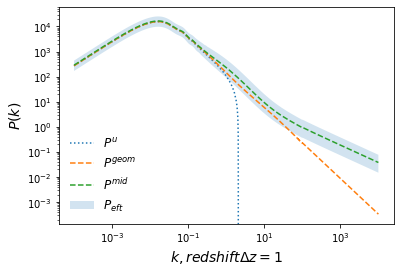

In [35]:
# Plot
plt.plot(ks,pueft[0][1], ':', label='$P^{u}$')
plt.plot(ks,np.sqrt(ppgeft)[0][1], '--', label='$P^{geom}$')
plt.plot(ks,pmeft[0][1], '--', label='$P^{mid}$')

plt.fill_between(ks, peft, peft1,alpha=0.2, label='$P_{eft}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k, redshift \Delta z = 1$', fontsize=14)
plt.ylabel('$P(k)$', fontsize=14)
plt.legend(loc='lower left', fontsize=12, frameon=False);